## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## 0. Downloading the data

In [5]:
data = load_boston()

In [6]:
X = data['data']
y = data['target']
features = data['feature_names']

In [7]:
df = pd.DataFrame(X, columns=features)
df['MEDV'] = y
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7575)

In [9]:
X_train.shape

(430, 13)

## 1.1 Selecting neurons quantity per layer

In [11]:
epochs_n = 1000

loss_log_neurons = {}

for i in range(5, 10):
    neurons_n = 2 ** (i + 1)
    model = Sequential([
        Dense(neurons_n, activation='relu', input_shape=(13, )),
        Dense(neurons_n, activation='relu'),
        Dense(neurons_n, activation='relu'),
        Dense(1, activation='linear')])

    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])
    
    history = model.fit(X_train, y_train, 
                    epochs=epochs_n, batch_size=1024, 
                    validation_split=0.15,
                    verbose=0)
    
    best_loss_id = np.argmin(history.history['val_loss'])
    best_loss = history.history['val_loss'][best_loss_id]
    loss_log_neurons[f'Model_{neurons_n}'] = (history, best_loss)

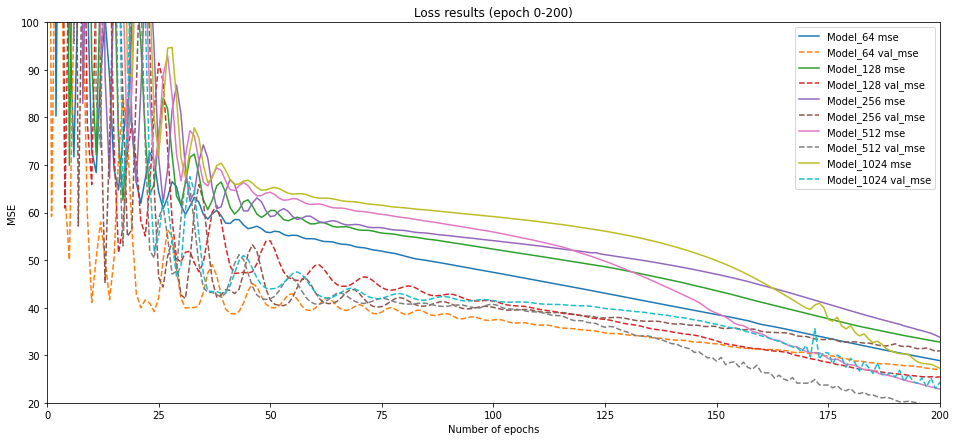

In [13]:
plt.figure(figsize=(16, 7))
epochs_n = 1000

for mod in loss_log_neurons:
    plt.plot(range(epochs_n), loss_log_neurons[mod][0].history['loss'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_neurons[mod][0].history['val_loss'], '--', label=f'{mod} val_mse')
plt.title('Loss results (epoch 0-200)')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.xlim(0, 200)
plt.ylim(20, 100)
plt.legend()
plt.show()

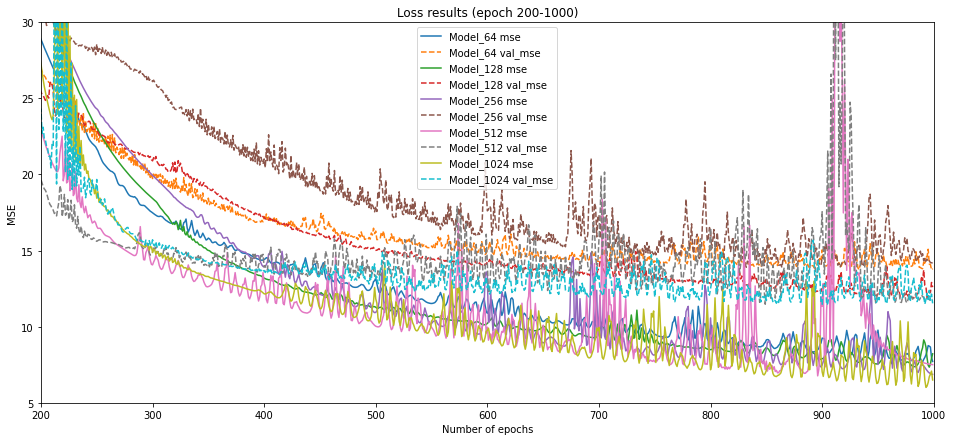

In [14]:
plt.figure(figsize=(16, 7))
epochs_n = 1000

for mod in loss_log_neurons:
    plt.plot(range(epochs_n), loss_log_neurons[mod][0].history['loss'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_neurons[mod][0].history['val_loss'], '--', label=f'{mod} val_mse')
plt.title('Loss results (epoch 200-1000)')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.xlim(200, epochs_n)
plt.ylim(5, 30)
plt.legend()
plt.show()

In [15]:
for mod in loss_log_neurons:
    print(f'{mod} best MSE -> {loss_log_neurons[mod][1]}')

Model_64 best MSE -> 13.734559059143066
Model_128 best MSE -> 11.88218879699707
Model_256 best MSE -> 13.883527755737305
Model_512 best MSE -> 11.478355407714844
Model_1024 best MSE -> 11.438889503479004


The last chart seems quite chaotic :) I guess, it's because of to high learning rate for such epoch number.  
  
Anyway, we can see, that we have no need to set so many neurons per layer, because the model with 128 neurons per layer did nearly as much as did the model with 1024 neurons per layer.  
  
At this point I will continue to use the model with 128 neurons per layer.

## 1.2 Looking for an optimal activation function

In [17]:
epochs_n = 100
loss_log_func = {}

activation_funcs = ['linear', 'relu', 'sigmoid', 'tanh']

for func in activation_funcs:
    neurons_n = 128
    model = Sequential([
        Dense(neurons_n, activation=func, input_shape=(13, )),
        Dense(neurons_n, activation=func),
        Dense(neurons_n, activation=func),
        Dense(1, activation='linear')])

    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])
    
    history = model.fit(X_train, y_train, 
                    epochs=epochs_n, batch_size=1024, 
                    validation_split=0.15,
                    verbose=0)
    
    best_loss_id = np.argmin(history.history['val_loss'])
    best_loss = history.history['val_loss'][best_loss_id]
    loss_log_func[f'Model_128_{func}'] = (history, best_loss)

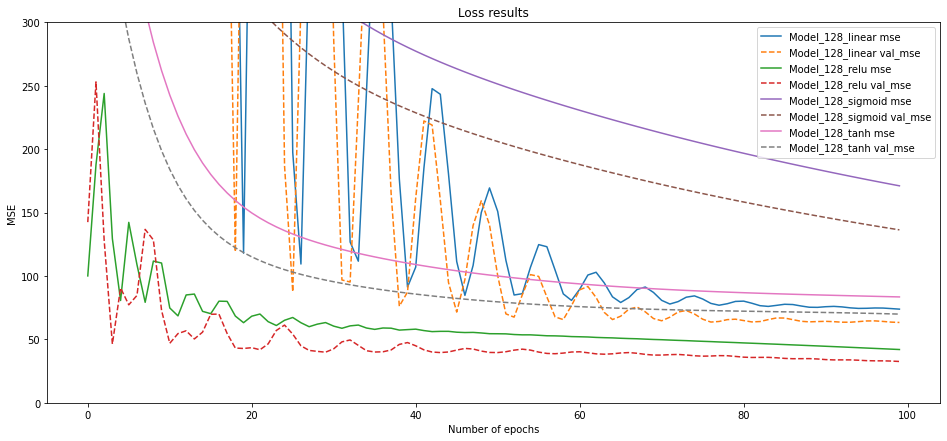

In [18]:
plt.figure(figsize=(16, 7))
epochs_n = 100

for mod in loss_log_func:
    plt.plot(range(epochs_n), loss_log_func[mod][0].history['loss'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_func[mod][0].history['val_loss'], '--', label=f'{mod} val_mse')
plt.title('Loss results')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.ylim(0, 300)
plt.legend()
plt.show()

In [19]:
for mod in loss_log_func:
    print(f'{mod} best MSE -> {loss_log_func[mod][1]}')

Model_128_linear best MSE -> 63.344139099121094
Model_128_relu best MSE -> 32.581966400146484
Model_128_sigmoid best MSE -> 136.3409881591797
Model_128_tanh best MSE -> 69.92266082763672


According to the chart above, relu did its job the best 

## 1.3 Checking optimizers results

In [20]:
epochs_n = 100
loss_log_optimizer = {}

optimizers = ['adam', 'adamax', 'nadam', 'rmsprop', 'sgd']

for optimizer in optimizers:
    neurons_n = 128
    model = Sequential([
        Dense(neurons_n, activation='relu', input_shape=(13, )),
        Dense(neurons_n, activation='relu'),
        Dense(neurons_n, activation='relu'),
        Dense(1, activation='linear')])

    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])
    
    history = model.fit(X_train, y_train, 
                    epochs=epochs_n, batch_size=1024, 
                    validation_split=0.15,
                    verbose=0)
    
    best_loss_id = np.argmin(history.history['val_loss'])
    best_loss = history.history['val_loss'][best_loss_id]
    loss_log_optimizer[f'Model_128_relu_{optimizer}'] = (history, best_loss)

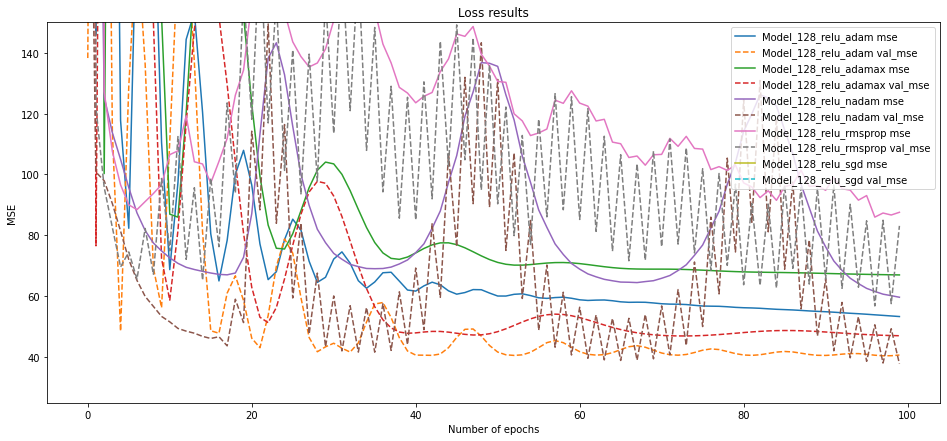

In [21]:
plt.figure(figsize=(16, 7))
epochs_n = 100

for mod in loss_log_optimizer:
    plt.plot(range(epochs_n), loss_log_optimizer[mod][0].history['loss'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_optimizer[mod][0].history['val_loss'], '--', label=f'{mod} val_mse')
plt.title('Loss results')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.ylim(25, 150)
plt.legend()
plt.show()

In [22]:
for mod in loss_log_optimizer:
    print(f'{mod} best MSE -> {loss_log_optimizer[mod][1]}')

Model_128_relu_adam best MSE -> 40.443851470947266
Model_128_relu_adamax best MSE -> 46.95829391479492
Model_128_relu_nadam best MSE -> 37.81663131713867
Model_128_relu_rmsprop best MSE -> 56.82155227661133
Model_128_relu_sgd best MSE -> nan


Similarly to relu, adam algorithm is way more reliable, than the other optimizers

## 2.1 Changing loss function  
  
Also, here I use `tf.keras.callbacks.ModelCheckpoint`. It saves different weights sets during the training and allows not only to save/load the model, but also to use the best weights the model has reached during the fit.  

In [27]:
epochs_n = 100
loss_log_loss = {}

losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 
          'mean_squared_logarithmic_error', 'cosine_similarity']

for loss in losses:
    neurons_n = 128
    model = Sequential([
        Dense(neurons_n, activation='relu', input_shape=(13, )),
        Dense(neurons_n, activation='relu'),
        Dense(neurons_n, activation='relu'),
        Dense(1, activation='linear')])

    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['mean_squared_error'])
    
    checkpoint_name = './tmp/' + f'Model_128_relu_adam_{loss}-' + 'Weights-{epoch:03d}--{val_mean_squared_error:.5f}.hdf5' 
    checkpoint = ModelCheckpoint(checkpoint_name, 
                                 monitor='val_mean_squared_error', verbose = 1, 
                                 save_best_only = True, mode ='auto')
    
    history = model.fit(X_train, y_train, 
                    epochs=epochs_n, batch_size=1024, 
                    validation_split=0.15, 
                    callbacks=[checkpoint],
                    verbose=0)
    
    best_loss_id = np.argmin(history.history['val_mean_squared_error'])
    best_loss = history.history['val_mean_squared_error'][best_loss_id]
    loss_log_loss[f'Model_128_relu_adam_{loss}'] = (history, best_loss)


Epoch 1: val_mean_squared_error improved from inf to 202.42995, saving model to ./tmp/Model_128_relu_adam_mean_squared_error-Weights-001--202.42995.hdf5

Epoch 2: val_mean_squared_error did not improve from 202.42995

Epoch 3: val_mean_squared_error did not improve from 202.42995

Epoch 4: val_mean_squared_error did not improve from 202.42995

Epoch 5: val_mean_squared_error improved from 202.42995 to 151.27701, saving model to ./tmp/Model_128_relu_adam_mean_squared_error-Weights-005--151.27701.hdf5

Epoch 6: val_mean_squared_error improved from 151.27701 to 52.56184, saving model to ./tmp/Model_128_relu_adam_mean_squared_error-Weights-006--52.56184.hdf5

Epoch 7: val_mean_squared_error did not improve from 52.56184

Epoch 8: val_mean_squared_error did not improve from 52.56184

Epoch 9: val_mean_squared_error did not improve from 52.56184

Epoch 10: val_mean_squared_error did not improve from 52.56184

Epoch 11: val_mean_squared_error did not improve from 52.56184

Epoch 12: val_mean


Epoch 100: val_mean_squared_error improved from 40.78852 to 40.70874, saving model to ./tmp/Model_128_relu_adam_mean_squared_error-Weights-100--40.70874.hdf5

Epoch 1: val_mean_squared_error improved from inf to 156.35036, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-001--156.35036.hdf5

Epoch 2: val_mean_squared_error did not improve from 156.35036

Epoch 3: val_mean_squared_error improved from 156.35036 to 47.62730, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-003--47.62730.hdf5

Epoch 4: val_mean_squared_error did not improve from 47.62730

Epoch 5: val_mean_squared_error did not improve from 47.62730

Epoch 6: val_mean_squared_error did not improve from 47.62730

Epoch 7: val_mean_squared_error did not improve from 47.62730

Epoch 8: val_mean_squared_error did not improve from 47.62730

Epoch 9: val_mean_squared_error did not improve from 47.62730

Epoch 10: val_mean_squared_error did not improve from 47.62730

Epoch 11: val_mean_s


Epoch 97: val_mean_squared_error improved from 31.01669 to 30.74865, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-097--30.74865.hdf5

Epoch 98: val_mean_squared_error did not improve from 30.74865

Epoch 99: val_mean_squared_error did not improve from 30.74865

Epoch 100: val_mean_squared_error did not improve from 30.74865

Epoch 1: val_mean_squared_error improved from inf to 234.48654, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-001--234.48654.hdf5

Epoch 2: val_mean_squared_error did not improve from 234.48654

Epoch 3: val_mean_squared_error improved from 234.48654 to 169.02734, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-003--169.02734.hdf5

Epoch 4: val_mean_squared_error improved from 169.02734 to 120.00825, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-004--120.00825.hdf5

Epoch 5: val_mean_squared_error did not improve from 120.00825

Epoch 6: 


Epoch 89: val_mean_squared_error did not improve from 34.73724

Epoch 90: val_mean_squared_error improved from 34.73724 to 34.51112, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-090--34.51112.hdf5

Epoch 91: val_mean_squared_error did not improve from 34.51112

Epoch 92: val_mean_squared_error improved from 34.51112 to 33.93903, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-092--33.93903.hdf5

Epoch 93: val_mean_squared_error did not improve from 33.93903

Epoch 94: val_mean_squared_error did not improve from 33.93903

Epoch 95: val_mean_squared_error did not improve from 33.93903

Epoch 96: val_mean_squared_error did not improve from 33.93903

Epoch 97: val_mean_squared_error improved from 33.93903 to 33.53750, saving model to ./tmp/Model_128_relu_adam_mean_absolute_percentage_error-Weights-097--33.53750.hdf5

Epoch 98: val_mean_squared_error did not improve from 33.53750

Epoch 99: val_mean_squared_error did not 


Epoch 4: val_mean_squared_error improved from 2761.36914 to 2752.23389, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-004--2752.23389.hdf5

Epoch 5: val_mean_squared_error improved from 2752.23389 to 2742.60718, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-005--2742.60718.hdf5

Epoch 6: val_mean_squared_error improved from 2742.60718 to 2732.16772, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-006--2732.16772.hdf5

Epoch 7: val_mean_squared_error improved from 2732.16772 to 2721.64380, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-007--2721.64380.hdf5

Epoch 8: val_mean_squared_error improved from 2721.64380 to 2711.96606, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-008--2711.96606.hdf5

Epoch 9: val_mean_squared_error improved from 2711.96606 to 2701.22827, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-009--2701.22827.hdf5

Epoch 10: val_mean_squared_


Epoch 55: val_mean_squared_error improved from 1986.26013 to 1962.46301, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-055--1962.46301.hdf5

Epoch 56: val_mean_squared_error improved from 1962.46301 to 1937.53577, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-056--1937.53577.hdf5

Epoch 57: val_mean_squared_error improved from 1937.53577 to 1909.14551, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-057--1909.14551.hdf5

Epoch 58: val_mean_squared_error improved from 1909.14551 to 1878.29590, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-058--1878.29590.hdf5

Epoch 59: val_mean_squared_error improved from 1878.29590 to 1844.77832, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-059--1844.77832.hdf5

Epoch 60: val_mean_squared_error improved from 1844.77832 to 1809.52405, saving model to ./tmp/Model_128_relu_adam_cosine_similarity-Weights-060--1809.52405.hdf5

Epoch 61: val_mean_sq

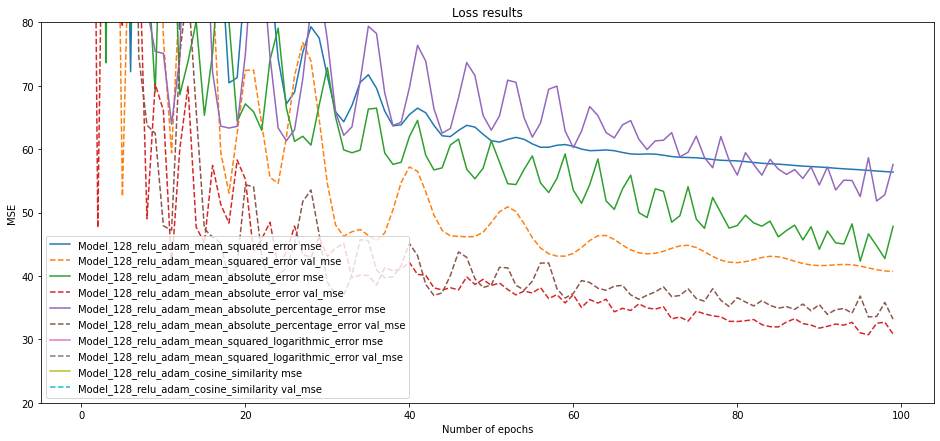

In [30]:
plt.figure(figsize=(16, 7))
epochs_n = 100

for mod in loss_log_loss:
    plt.plot(range(epochs_n), loss_log_loss[mod][0].history['mean_squared_error'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_loss[mod][0].history['val_mean_squared_error'], '--', label=f'{mod} val_mse')
plt.title('Loss results')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.ylim(20, 80)
plt.legend()
plt.show()

In [31]:
for mod in loss_log_loss:
    print(f'{mod} best MSE -> {loss_log_loss[mod][1]}')

Model_128_relu_adam_mean_squared_error best MSE -> 40.708736419677734
Model_128_relu_adam_mean_absolute_error best MSE -> 30.7486515045166
Model_128_relu_adam_mean_absolute_percentage_error best MSE -> 33.18509292602539
Model_128_relu_adam_mean_squared_logarithmic_error best MSE -> 999.8565063476562
Model_128_relu_adam_cosine_similarity best MSE -> 127.22809600830078


From the tested losses I can rate MSE and MAE as top 2 for our model. Eventually, MAE has provided us with the best results, so we can consider it as a best loss function.  
  
### Let's train our final model a bit more, using the saved weights  

In [32]:
model.load_weights('./tmp/Model_128_relu_adam_mean_absolute_error-Weights-097--30.74865.hdf5')

model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=['mean_squared_error'])

checkpoint_name = './tmp/Model_128_relu_adam_mean_absolute_error-Weights-{epoch:03d}--{val_mean_squared_error:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, 
                             monitor='val_mean_squared_error', verbose = 1, 
                             save_best_only = True, mode ='auto')

epochs_n = 1000
loss_log_fin = {}

history = model.fit(X_train, y_train, 
                    epochs=epochs_n, batch_size=1024, 
                    validation_split=0.15, 
                    callbacks=[checkpoint],
                    verbose=0)
    
best_loss_id = np.argmin(history.history['val_mean_squared_error'])
best_loss = history.history['val_mean_squared_error'][best_loss_id]
loss_log_fin[f'Model_128_relu_adam_{loss}'] = (history, best_loss)


Epoch 1: val_mean_squared_error improved from inf to 605.65100, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-001--605.65100.hdf5

Epoch 2: val_mean_squared_error improved from 605.65100 to 156.90186, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-002--156.90186.hdf5

Epoch 3: val_mean_squared_error did not improve from 156.90186

Epoch 4: val_mean_squared_error improved from 156.90186 to 100.07907, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-004--100.07907.hdf5

Epoch 5: val_mean_squared_error improved from 100.07907 to 96.02339, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-005--96.02339.hdf5

Epoch 6: val_mean_squared_error did not improve from 96.02339

Epoch 7: val_mean_squared_error did not improve from 96.02339

Epoch 8: val_mean_squared_error improved from 96.02339 to 45.89041, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-008--45.89041.hdf5

Epoch 9: val_me


Epoch 88: val_mean_squared_error did not improve from 27.90318

Epoch 89: val_mean_squared_error did not improve from 27.90318

Epoch 90: val_mean_squared_error did not improve from 27.90318

Epoch 91: val_mean_squared_error improved from 27.90318 to 27.79345, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-091--27.79345.hdf5

Epoch 92: val_mean_squared_error did not improve from 27.79345

Epoch 93: val_mean_squared_error did not improve from 27.79345

Epoch 94: val_mean_squared_error did not improve from 27.79345

Epoch 95: val_mean_squared_error did not improve from 27.79345

Epoch 96: val_mean_squared_error improved from 27.79345 to 27.78863, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-096--27.78863.hdf5

Epoch 97: val_mean_squared_error improved from 27.78863 to 27.75108, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-097--27.75108.hdf5

Epoch 98: val_mean_squared_error did not improve from 27.75108

Epoch 99: 


Epoch 191: val_mean_squared_error did not improve from 24.99117

Epoch 192: val_mean_squared_error did not improve from 24.99117

Epoch 193: val_mean_squared_error did not improve from 24.99117

Epoch 194: val_mean_squared_error did not improve from 24.99117

Epoch 195: val_mean_squared_error did not improve from 24.99117

Epoch 196: val_mean_squared_error improved from 24.99117 to 24.94518, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-196--24.94518.hdf5

Epoch 197: val_mean_squared_error did not improve from 24.94518

Epoch 198: val_mean_squared_error did not improve from 24.94518

Epoch 199: val_mean_squared_error did not improve from 24.94518

Epoch 200: val_mean_squared_error did not improve from 24.94518

Epoch 201: val_mean_squared_error did not improve from 24.94518

Epoch 202: val_mean_squared_error did not improve from 24.94518

Epoch 203: val_mean_squared_error did not improve from 24.94518

Epoch 204: val_mean_squared_error did not improve from 24.9


Epoch 299: val_mean_squared_error did not improve from 22.61518

Epoch 300: val_mean_squared_error improved from 22.61518 to 22.54587, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-300--22.54587.hdf5

Epoch 301: val_mean_squared_error improved from 22.54587 to 22.46345, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-301--22.46345.hdf5

Epoch 302: val_mean_squared_error did not improve from 22.46345

Epoch 303: val_mean_squared_error did not improve from 22.46345

Epoch 304: val_mean_squared_error did not improve from 22.46345

Epoch 305: val_mean_squared_error did not improve from 22.46345

Epoch 306: val_mean_squared_error did not improve from 22.46345

Epoch 307: val_mean_squared_error did not improve from 22.46345

Epoch 308: val_mean_squared_error improved from 22.46345 to 22.41004, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-308--22.41004.hdf5

Epoch 309: val_mean_squared_error improved from 22.41004 to 21.9


Epoch 399: val_mean_squared_error did not improve from 20.16801

Epoch 400: val_mean_squared_error did not improve from 20.16801

Epoch 401: val_mean_squared_error improved from 20.16801 to 19.76314, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-401--19.76314.hdf5

Epoch 402: val_mean_squared_error improved from 19.76314 to 19.60639, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-402--19.60639.hdf5

Epoch 403: val_mean_squared_error did not improve from 19.60639

Epoch 404: val_mean_squared_error did not improve from 19.60639

Epoch 405: val_mean_squared_error did not improve from 19.60639

Epoch 406: val_mean_squared_error improved from 19.60639 to 19.37177, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-406--19.37177.hdf5

Epoch 407: val_mean_squared_error did not improve from 19.37177

Epoch 408: val_mean_squared_error did not improve from 19.37177

Epoch 409: val_mean_squared_error did not improve from 19.37177



Epoch 504: val_mean_squared_error improved from 17.82906 to 17.73686, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-504--17.73686.hdf5

Epoch 505: val_mean_squared_error did not improve from 17.73686

Epoch 506: val_mean_squared_error did not improve from 17.73686

Epoch 507: val_mean_squared_error did not improve from 17.73686

Epoch 508: val_mean_squared_error did not improve from 17.73686

Epoch 509: val_mean_squared_error did not improve from 17.73686

Epoch 510: val_mean_squared_error did not improve from 17.73686

Epoch 511: val_mean_squared_error did not improve from 17.73686

Epoch 512: val_mean_squared_error improved from 17.73686 to 17.49591, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-512--17.49591.hdf5

Epoch 513: val_mean_squared_error did not improve from 17.49591

Epoch 514: val_mean_squared_error did not improve from 17.49591

Epoch 515: val_mean_squared_error did not improve from 17.49591

Epoch 516: val_mean_squared_e


Epoch 606: val_mean_squared_error did not improve from 15.00119

Epoch 607: val_mean_squared_error did not improve from 15.00119

Epoch 608: val_mean_squared_error did not improve from 15.00119

Epoch 609: val_mean_squared_error did not improve from 15.00119

Epoch 610: val_mean_squared_error did not improve from 15.00119

Epoch 611: val_mean_squared_error did not improve from 15.00119

Epoch 612: val_mean_squared_error did not improve from 15.00119

Epoch 613: val_mean_squared_error did not improve from 15.00119

Epoch 614: val_mean_squared_error did not improve from 15.00119

Epoch 615: val_mean_squared_error did not improve from 15.00119

Epoch 616: val_mean_squared_error did not improve from 15.00119

Epoch 617: val_mean_squared_error did not improve from 15.00119

Epoch 618: val_mean_squared_error improved from 15.00119 to 14.95614, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-618--14.95614.hdf5

Epoch 619: val_mean_squared_error did not improve from 14.9


Epoch 721: val_mean_squared_error did not improve from 13.28159

Epoch 722: val_mean_squared_error did not improve from 13.28159

Epoch 723: val_mean_squared_error improved from 13.28159 to 13.07877, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-723--13.07877.hdf5

Epoch 724: val_mean_squared_error improved from 13.07877 to 13.04796, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-724--13.04796.hdf5

Epoch 725: val_mean_squared_error did not improve from 13.04796

Epoch 726: val_mean_squared_error did not improve from 13.04796

Epoch 727: val_mean_squared_error did not improve from 13.04796

Epoch 728: val_mean_squared_error did not improve from 13.04796

Epoch 729: val_mean_squared_error improved from 13.04796 to 12.78978, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-729--12.78978.hdf5

Epoch 730: val_mean_squared_error did not improve from 12.78978

Epoch 731: val_mean_squared_error did not improve from 12.78978



Epoch 840: val_mean_squared_error did not improve from 11.98318

Epoch 841: val_mean_squared_error did not improve from 11.98318

Epoch 842: val_mean_squared_error did not improve from 11.98318

Epoch 843: val_mean_squared_error did not improve from 11.98318

Epoch 844: val_mean_squared_error did not improve from 11.98318

Epoch 845: val_mean_squared_error did not improve from 11.98318

Epoch 846: val_mean_squared_error did not improve from 11.98318

Epoch 847: val_mean_squared_error did not improve from 11.98318

Epoch 848: val_mean_squared_error improved from 11.98318 to 11.89565, saving model to ./tmp/Model_128_relu_adam_mean_absolute_error-Weights-848--11.89565.hdf5

Epoch 849: val_mean_squared_error did not improve from 11.89565

Epoch 850: val_mean_squared_error did not improve from 11.89565

Epoch 851: val_mean_squared_error did not improve from 11.89565

Epoch 852: val_mean_squared_error did not improve from 11.89565

Epoch 853: val_mean_squared_error did not improve from 11.8


Epoch 962: val_mean_squared_error did not improve from 11.65613

Epoch 963: val_mean_squared_error did not improve from 11.65613

Epoch 964: val_mean_squared_error did not improve from 11.65613

Epoch 965: val_mean_squared_error did not improve from 11.65613

Epoch 966: val_mean_squared_error did not improve from 11.65613

Epoch 967: val_mean_squared_error did not improve from 11.65613

Epoch 968: val_mean_squared_error did not improve from 11.65613

Epoch 969: val_mean_squared_error did not improve from 11.65613

Epoch 970: val_mean_squared_error did not improve from 11.65613

Epoch 971: val_mean_squared_error did not improve from 11.65613

Epoch 972: val_mean_squared_error did not improve from 11.65613

Epoch 973: val_mean_squared_error did not improve from 11.65613

Epoch 974: val_mean_squared_error did not improve from 11.65613

Epoch 975: val_mean_squared_error did not improve from 11.65613

Epoch 976: val_mean_squared_error did not improve from 11.65613

Epoch 977: val_mean_squa

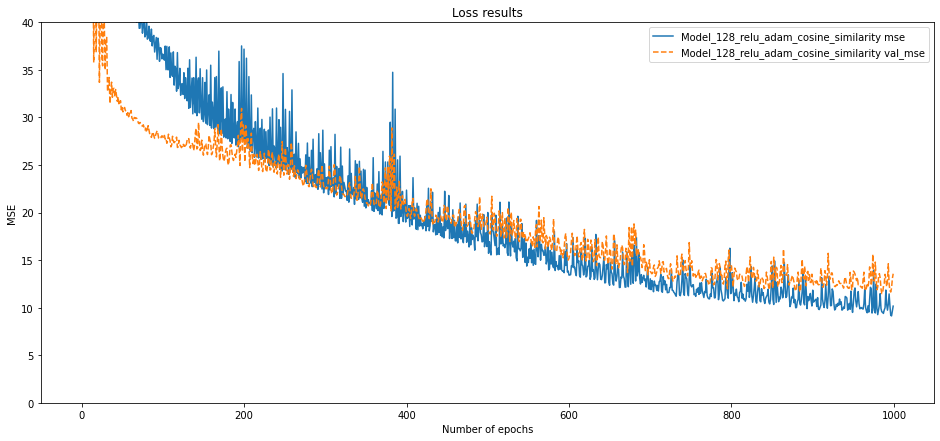

In [33]:
plt.figure(figsize=(16, 7))
epochs_n = 1000

for mod in loss_log_fin:
    plt.plot(range(epochs_n), loss_log_fin[mod][0].history['mean_squared_error'], '-', label=f'{mod} mse')
    plt.plot(range(epochs_n), loss_log_fin[mod][0].history['val_mean_squared_error'], '--', label=f'{mod} val_mse')
plt.title('Loss results')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.ylim(0, 40)
plt.legend()
plt.show()

In [34]:
for mod in loss_log_fin:
    print(f'{mod} best MSE -> {loss_log_fin[mod][1]}')

Model_128_relu_adam_cosine_similarity best MSE -> 11.477046966552734


Due to `ModelCheckpoint` we can continue our model training every time from the best place.  
  
## Visualization of predictions on test data

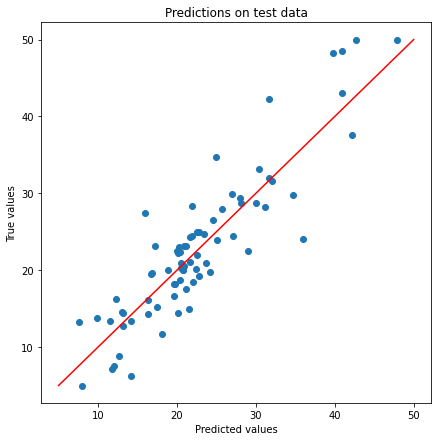

In [211]:
y_pred = model.predict(X_test).T

plt.figure(figsize=(7,7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='r')
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Predictions on test data')
plt.show()

In [37]:
mae, mse = model.evaluate(X_test, y_test)
print(f'MAE on the test data -> {mae}\nMSE on the test data -> {mse}')

3/3 [==============================] - 0s 3ms/step - loss: 3.4277 - mean_squared_error: 19.7759
MAE on the test data -> 3.4276866912841797
MSE on the test data -> 19.7758731842041


## Finally 
  
We've ended up with a good model. Its predictions don't differs to much from the scores during training. During the lesson I had lowered mean squared error from 50 on train/validation data to 19 on test data.  
  
All in all, the main goal of the lesson was just to investigate tensorflow more. There weren't any tricky data, feature engineering, awesome EDA. It was more about practice and testing my theoretical knowledge on deep neural networks :)